### This is for the assignment of Numerical methods for unsteady PDEs: finite differences and finite volumes.
#### Author: Yu Xiang, Email: shawnxiangyu@yahoo.com 
#### Student ID: 3805865

In [313]:
import os
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
import numpy as np
import random
from scipy.linalg import norm

In [314]:
# choose a large font size by default and use tex for math
fontsize = 10
params = {'axes.labelsize': fontsize + 2,
      'font.size': fontsize + 2,
      'legend.fontsize': fontsize + 2,
      'xtick.labelsize': fontsize,
      'ytick.labelsize': fontsize}
plt.rcParams.update(params)

In [315]:
# hyper_parameters and initialization
pi = 3.14159265358979323846

NrX = 100 + 1 
LenX = 1
NrT = 100

# CFL
v = 0.5 # v = CFL  = dt / (dx ** 2)
U_data = np.zeros((NrX,NrT))
U_old = np.zeros((NrX,1))
U_new = np.zeros(NrX)
xx_grid = np.zeros((NrX, 1))
dx = LenX / (NrX - 1)

In [316]:
# create the xx grid
for i in np.arange(0,NrX):
    xx_grid[i,0] = i * dx

# initial as a sin function 
U_old[:,0] = np.sin(2 * pi * xx_grid[:,0])  # time 0 value is sin(2 * pi * x)


In [317]:
def cal_U (v, U_old): 
    
    p1 = v ** 2 / 2. - v / 12.
    p2 = 4 / 3. * v  - 2. * v ** 2
    p3 = 1 - 2 * (p1 + p2)

    dt = v * (dx ** 2)
    
    M = np.zeros((NrX, NrX)) # maxitrix of Jh_dt = M, : U(n+1) = M * U(n) 
    U_data = np.zeros((NrX,NrT))

    for i in np.arange(NrX): 
        pre1c = (NrX + i - 1) % NrX
        pre2c = (NrX + i - 2) % NrX
        aft1c = (NrX + i + 1) % NrX
        aft2c = (NrX + i + 2) % NrX

        M[i, pre2c] = p1
        M[i, aft2c] = p1
        M[i, pre1c] = p2
        M[i, aft1c] = p2
        M[i, i] = p3
        
    time = 0.
    U_data[:,0] = U_old[:,0]
    for t in np.arange(1,NrT):
        time = time + dt    
        U_data[:,t] = M.dot(U_data[:,t-1])    
    
    return U_data
    

In [318]:
# test with different CFL
vs = [0, 0.01, 0.1, 0.35, 0.5, 0.65, 0.75, 0.85]

Nr_v = len(vs)
U_news = np.zeros((NrX, Nr_v))
for vi in np.arange(Nr_v): 
    U_data = cal_U(vs[vi], U_old)
    U_news[:,vi] = U_data[:,-1]


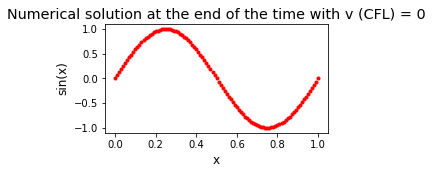

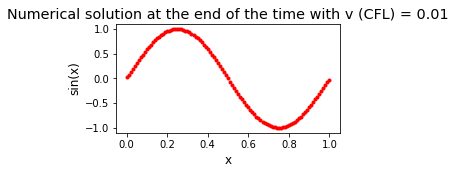

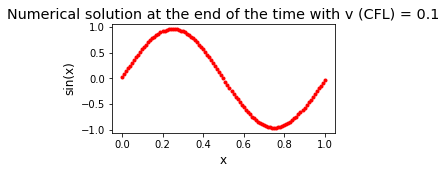

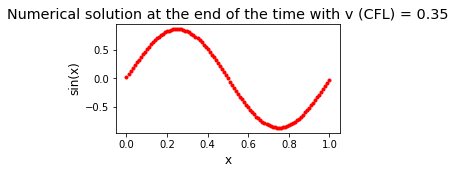

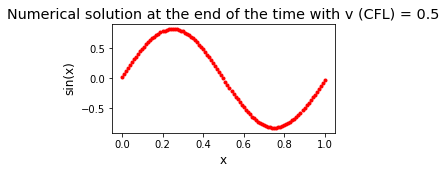

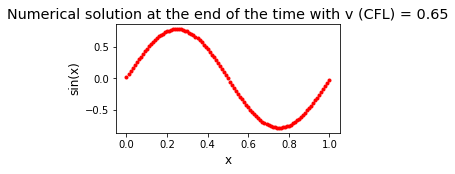

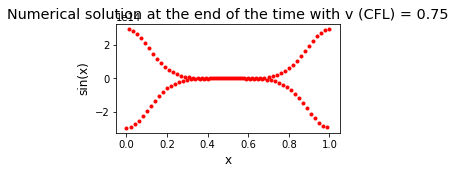

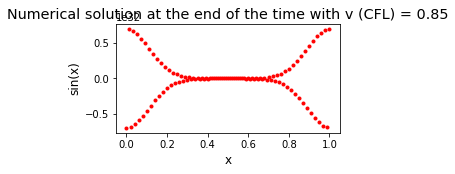

In [319]:
# plot the result with differnt CFL: check stablility
for vi in np.arange(Nr_v):
    fig, ax = plt.subplots(figsize=(4, 2))
    ax.set_xlabel('x')
    ax.set_ylabel('sin(x)')
    ax.set_title('Numerical solution at the end of the time with v (CFL) = '
                 + str(vs[vi]))
    plt.plot(xx_grid, U_news[:,vi],  'r.')
        
plt.show()


### Clearly the scheme is stable when v(CFL) is no larger than around 0.65

In [320]:
# test with another function
alpha = 0.35 
beta = 2

# CFL 
v = 0.35
NrT = 1000
dt = v * (dx ** 2)
T = dt * NrT
U_data = np.zeros((NrX,NrT))

for i in np.arange(0,NrX):
    xx_grid[i,0] = i * dx
 

U_old = alpha * np.sin(2 * pi * xx_grid) + beta * np.cos(2 * pi * xx_grid)
U_analytic = (alpha * np.sin(2 * pi * xx_grid) 
              + beta * np.cos(2 * pi * xx_grid)) 
              * np.exp(-4 * pi ** 2 * T)
U_data = cal_U(v, U_old)
U_new = U_data[:,-1]


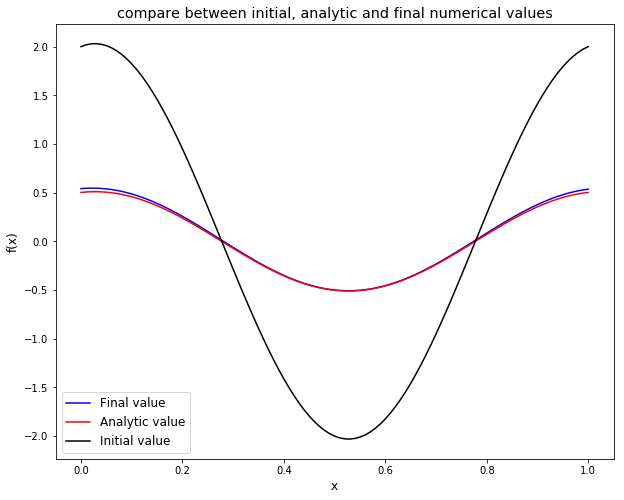

In [321]:
# plot the result
plt.figure(figsize=(10, 8))
plt.plot(xx_grid, U_new,"b",label="Final value")
plt.plot(xx_grid, U_analytic,"r",label="Analytic value") 
plt.plot(xx_grid, U_old,"k",label="Initial value") 
plt.title('compare between initial, analytic and final numerical values')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [322]:
u_diff = U_data - U_analytic
norm_u_diff = norm(u_diff, ord=2, axis=0) 

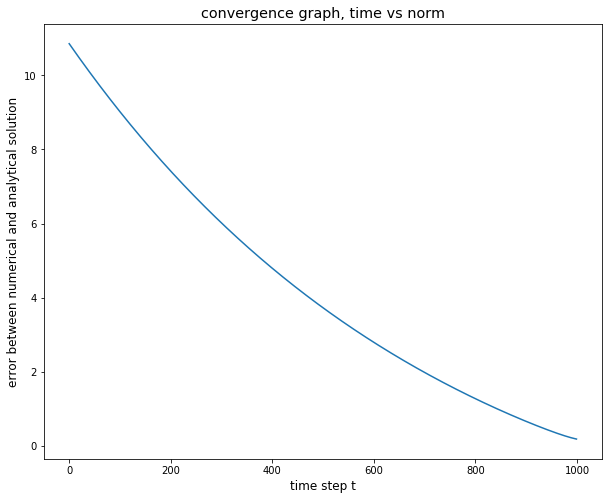

In [323]:
plt.figure(figsize=(10, 8))
plt.plot(np.arange(NrT), norm_u_diff)
plt.xlabel('time step t')
plt.ylabel('error between numerical and analytical solution')
plt.title('convergence graph, time vs norm')
plt.show()

### the convergence rate, as shown from above graph  looks like linear